In [2]:
import pandas as pd

# 加载数据集以获取概览
file_path = 'complete_macro_indicators_filtered.xlsx'
data = pd.read_excel(file_path)

# 显示数据集的前几行以了解其结构和内容
data.head()


DATE      GDP     GDPC1       GDPPOT  CPIAUCSL  CPILFESL  GDPDEF  \
0 1954-04-01  386.121  2848.305  2904.642537     26.86       NaN  13.556   
1 1954-07-01  390.996  2880.482  2922.682483     26.86       NaN  13.574   
2 1954-10-01  399.734  2936.852  2941.203176     26.72       NaN  13.611   
3 1955-04-01  421.532  3069.910  2978.435270     26.79       NaN  13.731   
4 1955-07-01  430.221  3111.379  2997.302681     26.76       NaN  13.827   

    DFF  DTB3  UNRATE  ...  PCEDG  PSAVERT  DSPI   INDPRO    GPDI      CP  \
0   NaN  1.02     5.9  ...    NaN      NaN   NaN  17.9066  55.449  22.529   
1  1.13  0.65     5.8  ...    NaN      NaN   NaN  18.0948  58.971  23.813   
2  0.50  0.97     5.7  ...    NaN      NaN   NaN  18.3099  62.139  25.515   
3  1.44  1.40     4.7  ...    NaN      NaN   NaN  20.2188  72.688  29.064   
4  1.69  1.46     4.0  ...    NaN      NaN   NaN  20.7297  74.747  29.843   

   DIVIDEND  MULTPL_SHILLER_PE_RATIO_MONTH    DJI    SPX  
0     9.172                          12.91  303.5  27.17  
1     9.568                          13.83  333.5  29.21  
2     9.748                          14.62  360.5  32.29  
3    10.396                          16.69  409.8  36.95  
4    11.048                          18.45  451.4  41.19  

[5 rows x 28 columns]

In [3]:
# 再次进行描述性统计分析，但不使用 'datetime_is_numeric' 参数
descriptive_stats_corrected = data.describe(include='all')
# 为了更好的可读性，对结果进行转置
descriptive_stats_corrected_transposed = descriptive_stats_corrected.transpose()

descriptive_stats_corrected_transposed


count                           mean  \
DATE                             146  1988-07-19 17:05:45.205479424   
GDP                            146.0                    7685.032986   
GDPC1                          146.0                   10591.354733   
GDPPOT                         146.0                   10727.513375   
CPIAUCSL                       146.0                     126.767438   
CPILFESL                       140.0                     134.679121   
GDPDEF                         146.0                      55.213096   
DFF                            145.0                        4.56069   
DTB3                           146.0                       3.896644   
UNRATE                         146.0                       6.110959   
NROU                           146.0                        5.42606   
CIVPART                        146.0                      63.060959   
EMRATIO                        146.0                      59.195205   
UNEMPLOY                       146.0                    7284.589041   
PAYEMS                         146.0                  101334.876712   
MANEMP                         146.0                   15706.006849   
DSPIC96                        134.0                     8255.24403   
PCE                            134.0                    5507.239552   
PCEDG                          134.0                     654.452239   
PSAVERT                        134.0                       8.696269   
DSPI                           134.0                    6163.645522   
INDPRO                         146.0                       62.87921   
GPDI                           146.0                    1334.233925   
CP                             146.0                     674.022418   
DIVIDEND                       146.0                     394.500712   
MULTPL_SHILLER_PE_RATIO_MONTH  146.0                      20.393973   
DJI                            146.0                       6770.925   
SPX                            146.0                     786.321781   

                                               min                  25%  \
DATE                           1954-04-01 00:00:00  1970-07-24 00:00:00   
GDP                                        386.121           1086.69625   
GDPC1                                     2848.305           5340.21925   
GDPPOT                                 2904.642537          5399.712559   
CPIAUCSL                                     26.72               39.025   
CPILFESL                                      28.8                 45.5   
GDPDEF                                      13.556                20.34   
DFF                                           0.06                 1.29   
DTB3                                         -0.02                1.125   
UNRATE                                         3.4                4.925   
NROU                                      4.435784              5.00565   
CIVPART                                       58.4                 60.1   
EMRATIO                                       51.2                 57.0   
UNEMPLOY                                    2571.0              4597.75   
PAYEMS                                     48835.0              71070.0   
MANEMP                                     11419.0              14232.0   
DSPIC96                                     2353.8              4537.15   
PCE                                          312.2               1006.2   
PCEDG                                         44.8                136.3   
PSAVERT                                        1.4                  5.8   
DSPI                                         358.2              1198.95   
INDPRO                                     17.9066            38.025175   
GPDI                                        55.449              174.819   
CP                                          22.529               61.373   
DIVIDEND                                     9.172               27.836   
MULTPL_SHILLER_PE_RAT

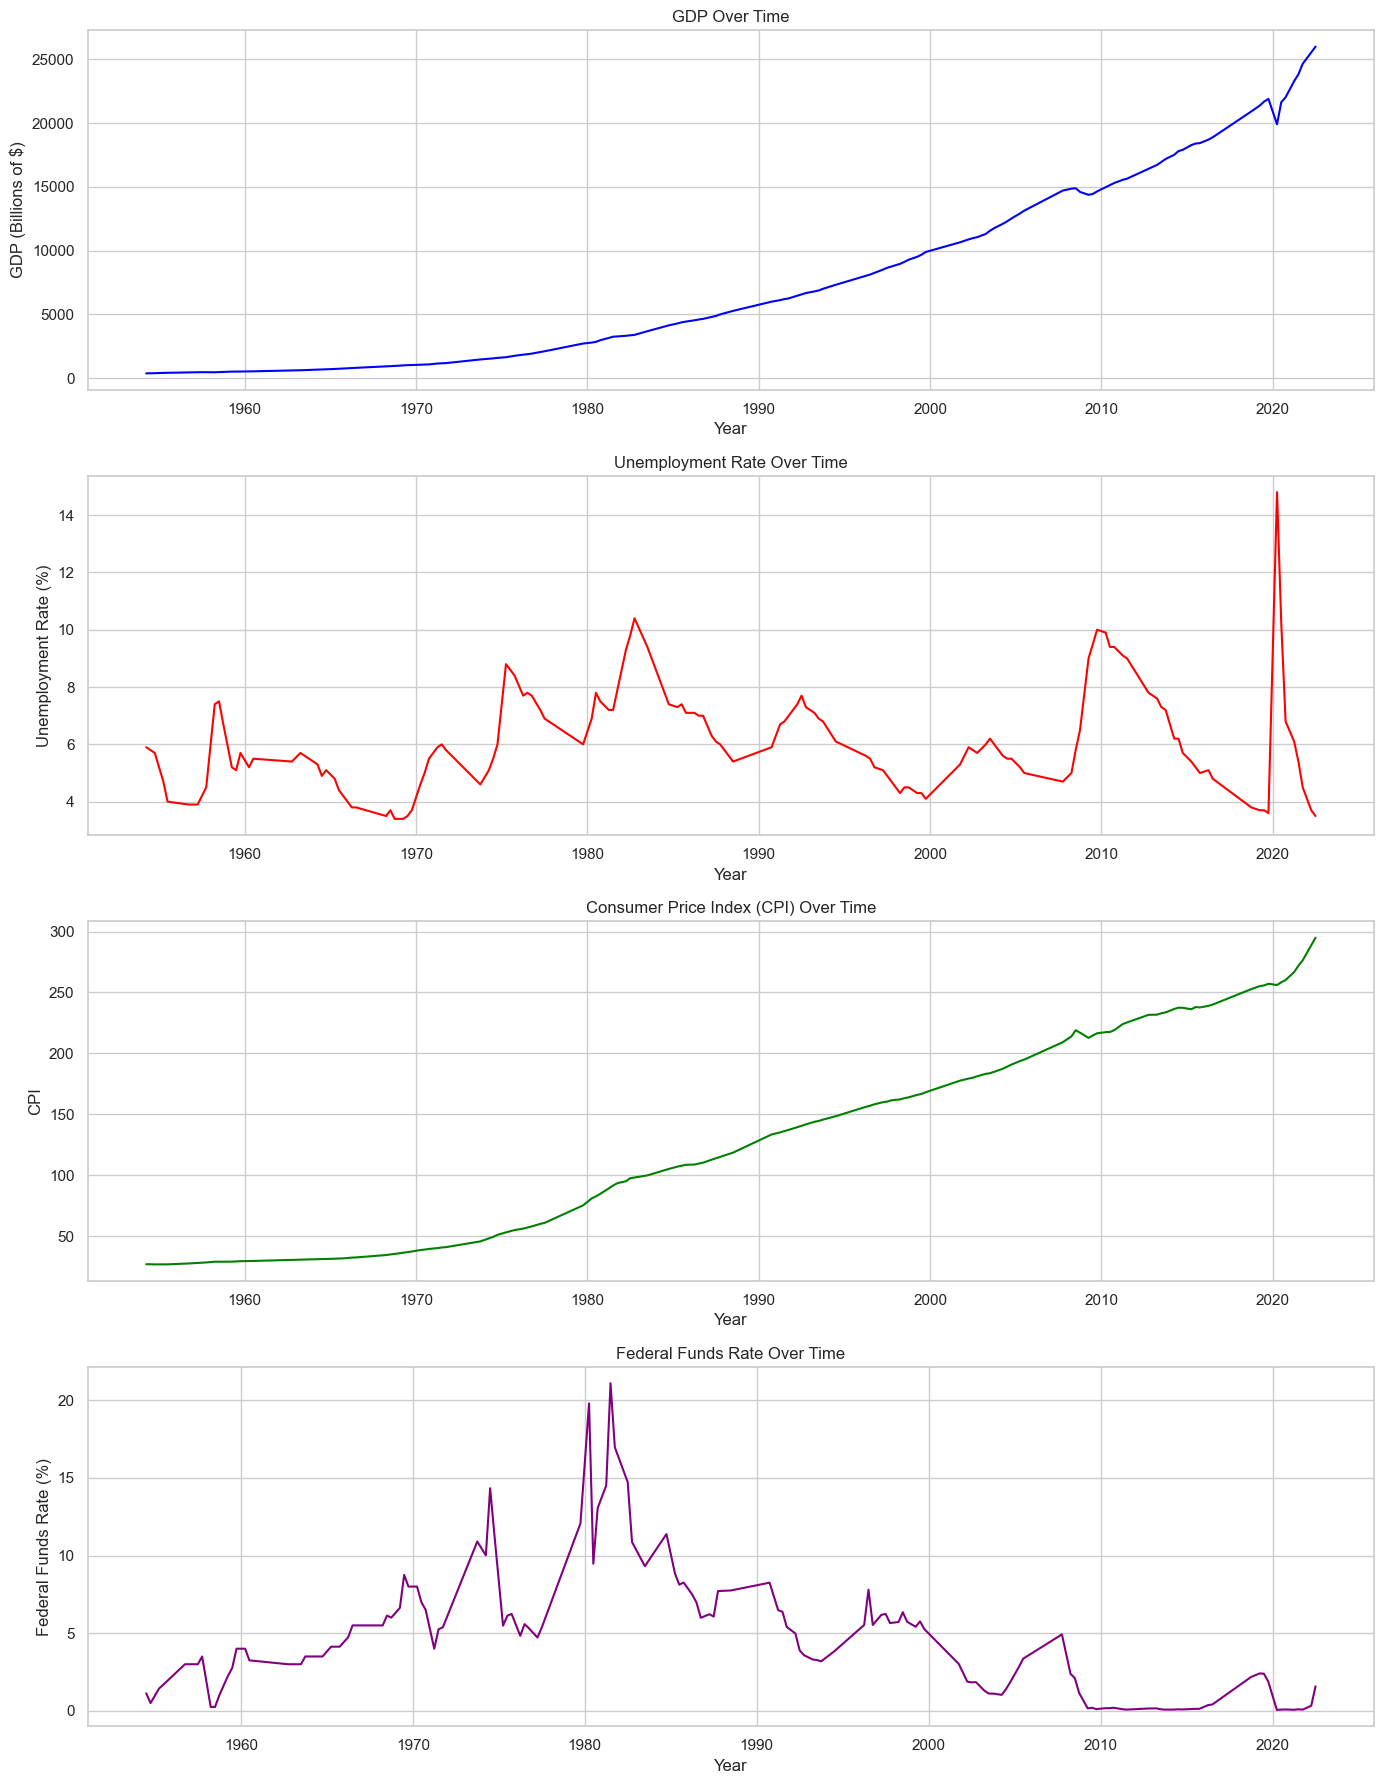

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置 seaborn 的样式
sns.set(style="whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号
# 创建几个宏观经济指标的时间序列图
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(14, 18), dpi=100)

# GDP随时间变化
sns.lineplot(data=data, x='DATE', y='GDP', ax=axes[0], color='blue')
axes[0].set_title('GDP随时间变化')
axes[0].set_ylabel('GDP（十亿美元）')
axes[0].set_xlabel('年份')

# 失业率随时间变化
sns.lineplot(data=data, x='DATE', y='UNRATE', ax=axes[1], color='red')
axes[1].set_title('失业率随时间变化')
axes[1].set_ylabel('失业率（%）')
axes[1].set_xlabel('年份')

# 消费者物价指数（CPI）随时间变化
sns.lineplot(data=data, x='DATE', y='CPIAUCSL', ax=axes[2], color='green')
axes[2].set_title('消费者物价指数（CPI）随时间变化')
axes[2].set_ylabel('CPI')
axes[2].set_xlabel('年份')

# 联邦基金利率随时间变化
sns.lineplot(data=data, x='DATE', y='DFF', ax=axes[3], color='purple')
axes[3].set_title('联邦基金利率随时间变化')
axes[3].set_ylabel('联邦基金利率（%）')
axes[3].set_xlabel('年份')

plt.tight_layout()
plt.show()


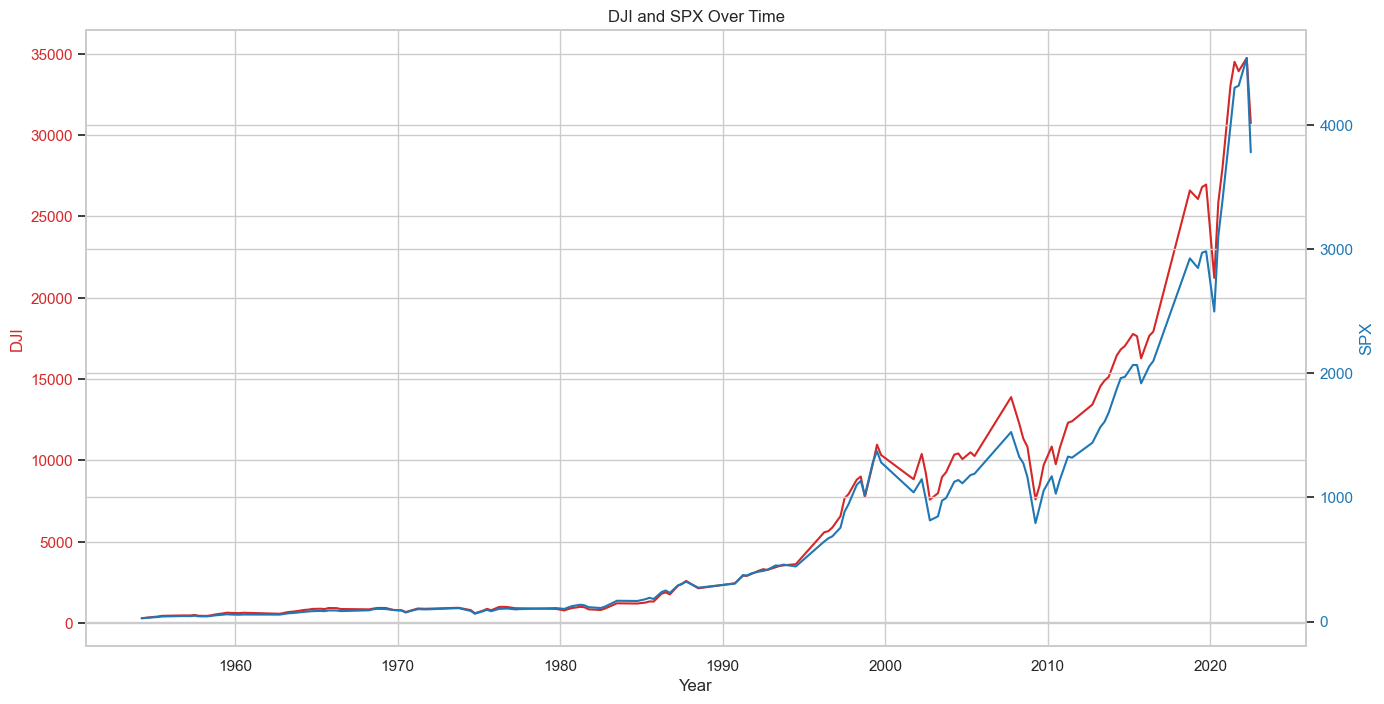

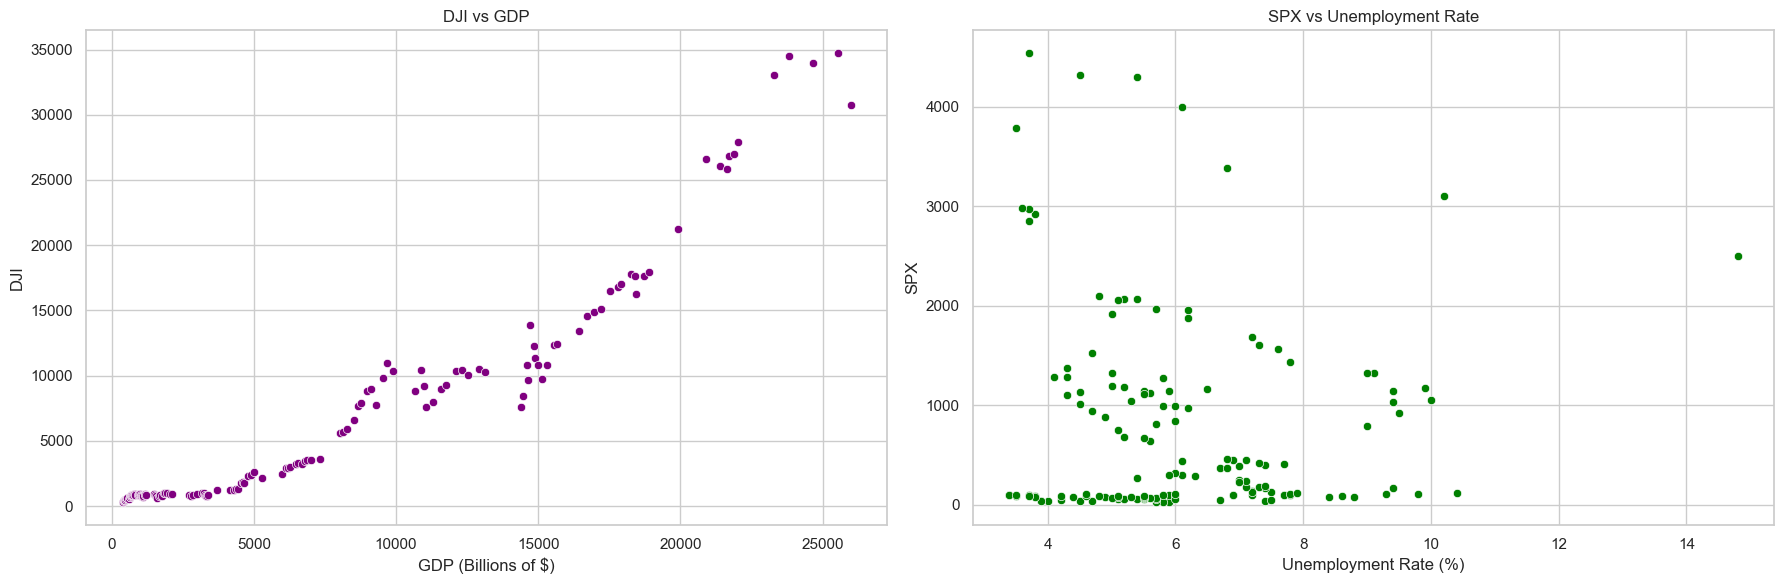

In [5]:
# 创建DJIA和标准普尔500指数（SPX）的时间序列图
fig, ax1 = plt.subplots(figsize=(14, 7), dpi=100)

color = 'tab:red'
ax1.set_xlabel('年份')
ax1.set_ylabel('DJIA', color=color)
ax1.plot(data['DATE'], data['DJI'], color=color, label='DJIA')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # 实例化一个共享相同x轴的第二个坐标轴
color = 'tab:blue'
ax2.set_ylabel('SPX', color=color)  # x轴标签已经由ax1处理
ax2.plot(data['DATE'], data['SPX'], color=color, label='SPX')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # 否则右边的y标签会稍微被裁剪
plt.title('DJIA和SPX随时间的变化')
plt.show()

# 分析DJIA与GDP以及SPX与失业率之间的关系
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6), dpi=100)

# DJIA与GDP之间的关系
sns.scatterplot(data=data, x='GDP', y='DJI', ax=axes[0], color='purple')
axes[0].set_title('DJIA vs GDP')
axes[0].set_xlabel('GDP（十亿美元）')
axes[0].set_ylabel('DJIA')

# SPX与失业率之间的关系
sns.scatterplot(data=data, x='UNRATE', y='SPX', ax=axes[1], color='green')
axes[1].set_title('SPX vs 失业率')
axes[1].set_xlabel('失业率（%）')
axes[1].set_ylabel('SPX')

plt.tight_layout()
plt.show()


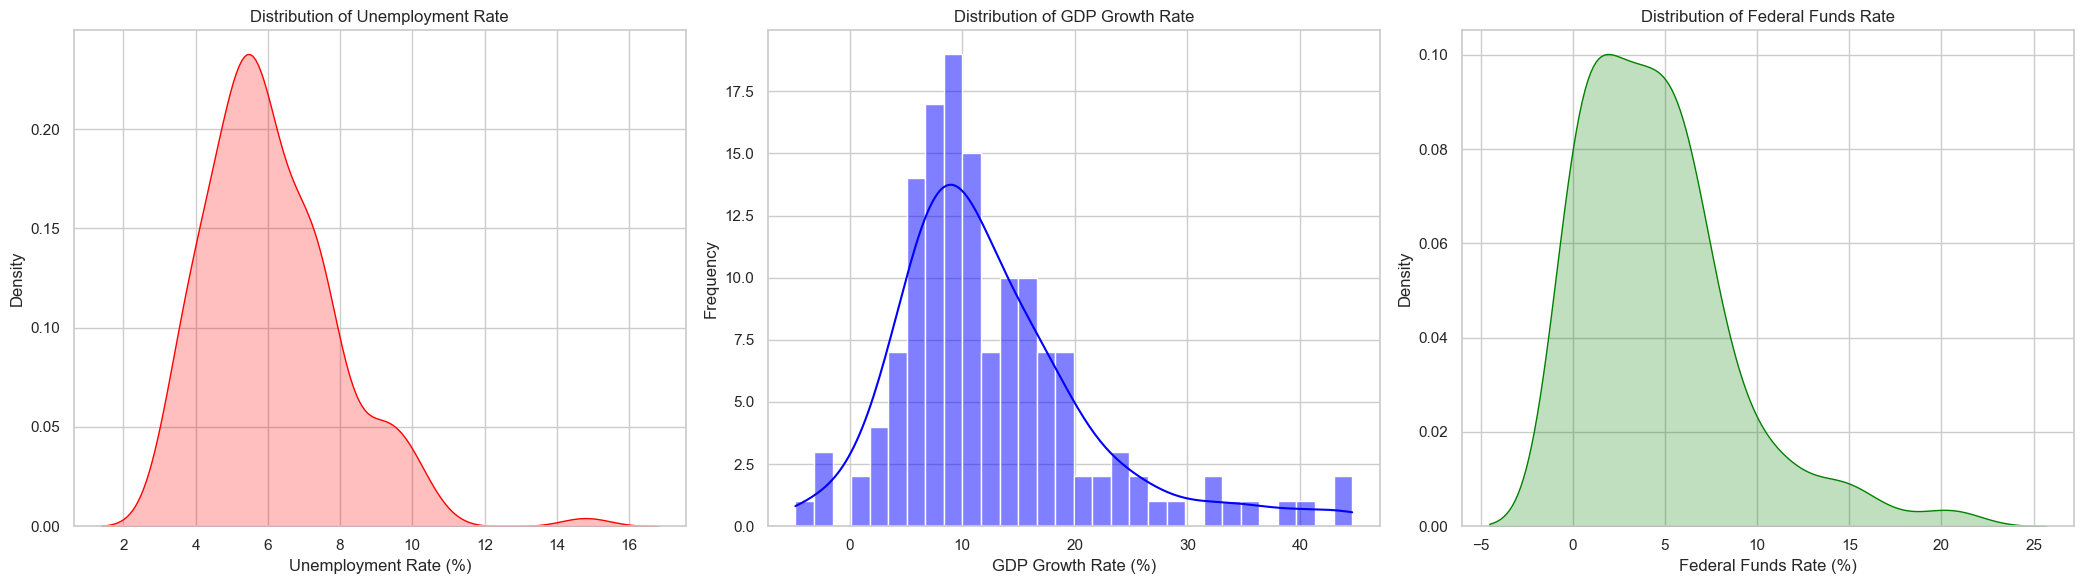

In [6]:
# 计算年度GDP增长率
data['GDP增长率'] = data['GDP'].pct_change(periods=4) * 100  # 计算年度GDP增长率

# 创建失业率、GDP增长率和联邦基金利率分布的图
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(21, 6), dpi=100)

# 失业率分布
sns.kdeplot(data=data, x='失业率', ax=axes[0], fill=True, color="red")
axes[0].set_title('失业率分布')
axes[0].set_xlabel('失业率（%）')
axes[0].set_ylabel('密度')

# GDP增长率分布
sns.histplot(data=data, x='GDP增长率', ax=axes[1], bins=30, color="blue", kde=True)
axes[1].set_title('GDP增长率分布')
axes[1].set_xlabel('GDP增长率（%）')
axes[1].set_ylabel('频率')

# 联邦基金利率分布
sns.kdeplot(data=data, x='联邦基金利率', ax=axes[2], fill=True, color="green")
axes[2].set_title('联邦基金利率分布')
axes[2].set_xlabel('联邦基金利率（%）')
axes[2].set_ylabel('密度')

plt.tight_layout()
plt.show()


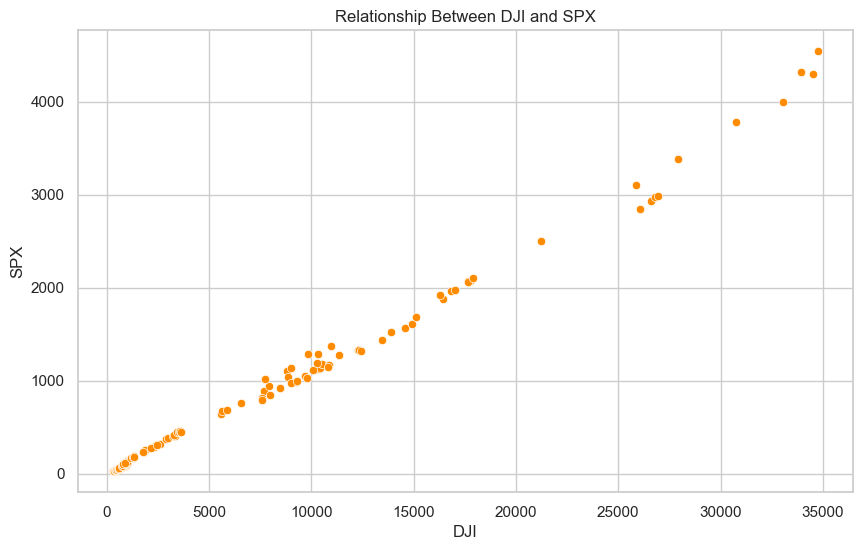

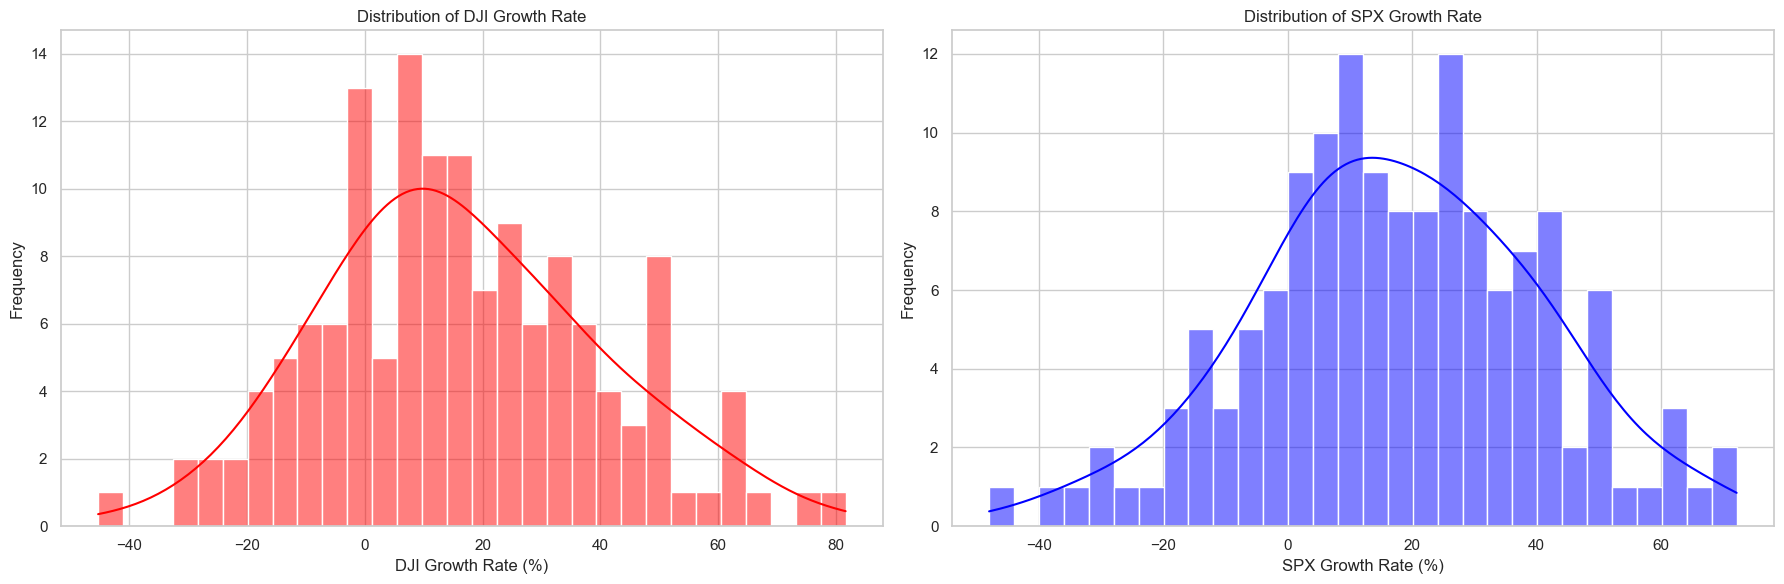

In [7]:
# 计算DJIA和标准普尔500指数（SPX）的年度增长率
data['DJIA增长率'] = data['DJIA'].pct_change(periods=4) * 100  # 计算DJIA的年度增长率
data['SPX增长率'] = data['SPX'].pct_change(periods=4) * 100  # 计算SPX的年度增长率

# 绘制DJIA和SPX之间的关系
plt.figure(figsize=(10, 6), dpi=100)
sns.scatterplot(data=data, x='DJIA', y='SPX', color="darkorange")
plt.title('DJIA和SPX之间的关系')
plt.xlabel('DJIA')
plt.ylabel('SPX')
plt.show()

# 比较DJIA和SPX的年度增长率
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6), dpi=100)

# DJIA增长率分布
sns.histplot(data=data, x='DJIA增长率', ax=axes[0], bins=30, color="red", kde=True)
axes[0].set_title('DJIA增长率分布')
axes[0].set_xlabel('DJIA增长率（%）')
axes[0].set_ylabel('频率')

# SPX增长率分布
sns.histplot(data=data, x='SPX增长率', ax=axes[1], bins=30, color="blue", kde=True)
axes[1].set_title('SPX增长率分布')
axes[1].set_xlabel('SPX增长率（%）')
axes[1].set_ylabel('频率')

plt.tight_layout()
plt.show()


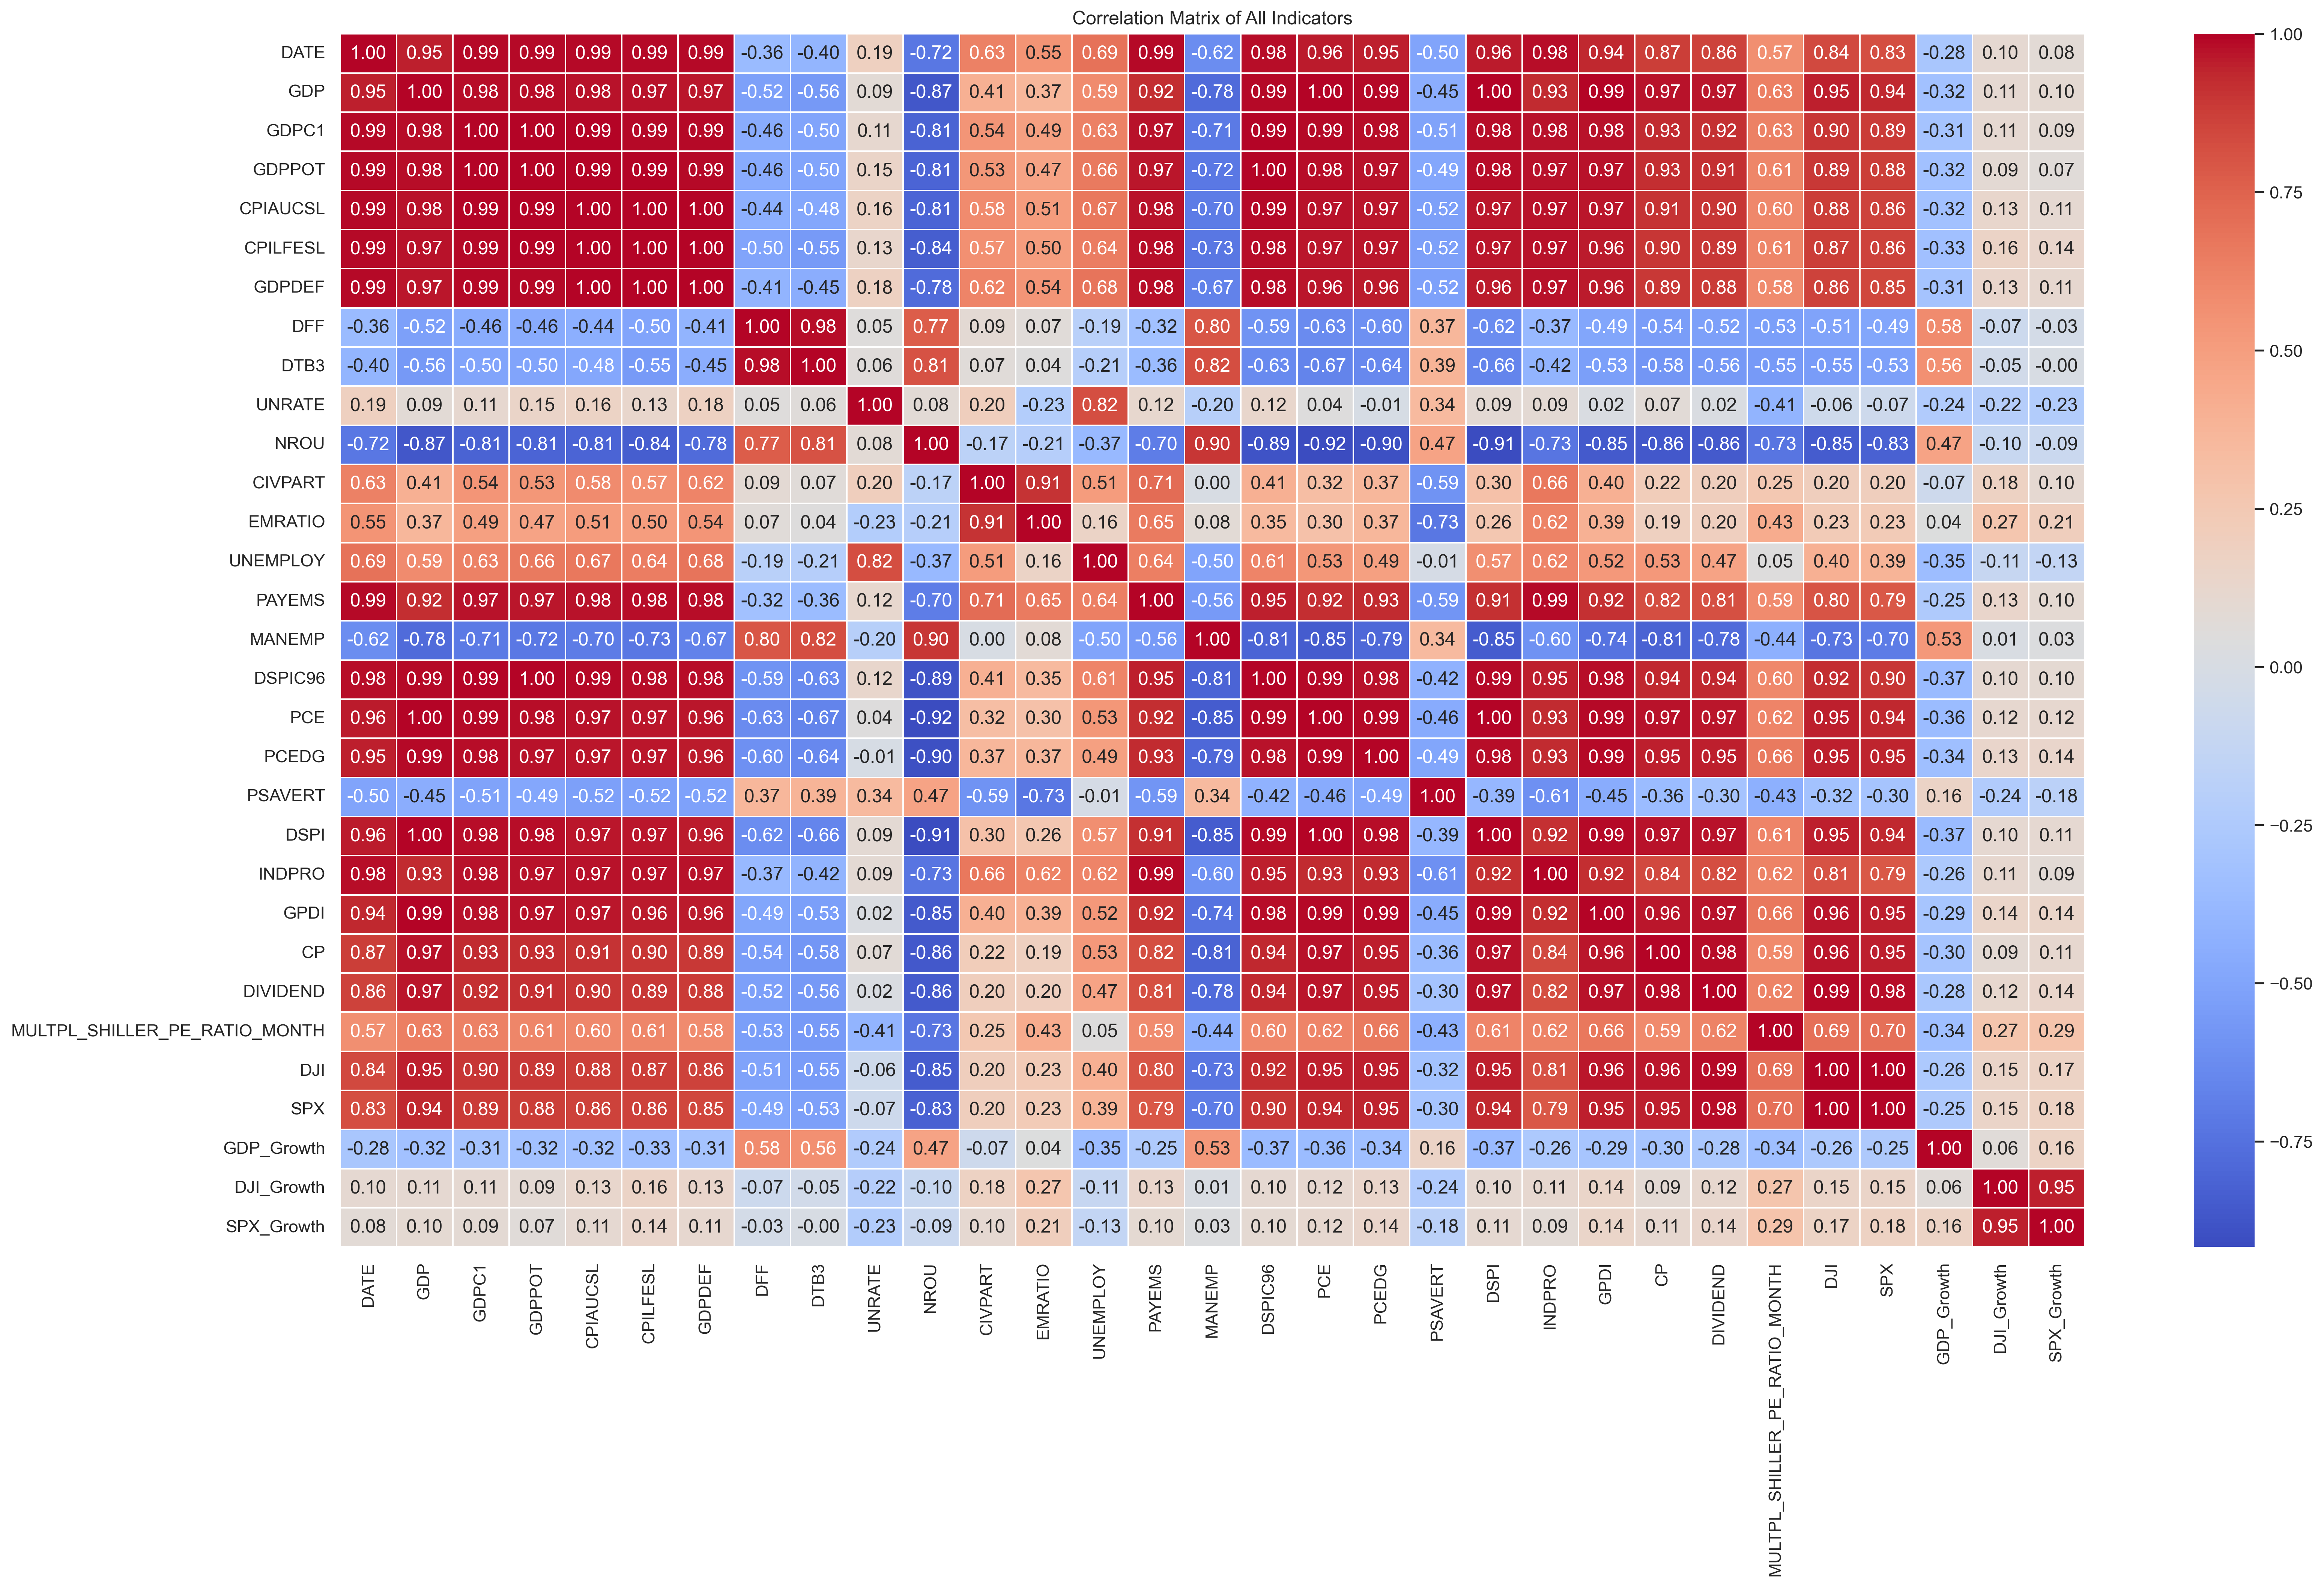

In [8]:
# 计算数据集的相关系数矩阵
correlation_matrix = data.corr()

# 绘制相关系数矩阵的热力图
plt.figure(figsize=(25, 14), dpi=300)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('所有指标的相关系数矩阵')
plt.show()


In [9]:
from sklearn.impute import KNNImputer

# 初始化KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)

# 选择需要插补的列（排除'DATE'列，因为它不是数值型）
columns_for_imputation = data.select_dtypes(include=['float64', 'int64']).columns
data_imputed = data[columns_for_imputation]

# 执行插补
data_imputed = pd.DataFrame(knn_imputer.fit_transform(data_imputed), columns=columns_for_imputation)

# 检查是否还有缺失值
missing_values_after_imputation = data_imputed.isnull().sum()

missing_values_after_imputation


GDP                              0
GDPC1                            0
GDPPOT                           0
CPIAUCSL                         0
CPILFESL                         0
GDPDEF                           0
DFF                              0
DTB3                             0
UNRATE                           0
NROU                             0
CIVPART                          0
EMRATIO                          0
UNEMPLOY                         0
PAYEMS                           0
MANEMP                           0
DSPIC96                          0
PCE                              0
PCEDG                            0
PSAVERT                          0
DSPI                             0
INDPRO                           0
GPDI                             0
CP                               0
DIVIDEND                         0
MULTPL_SHILLER_PE_RATIO_MONTH    0
DJI                              0
SPX                              0
GDP_Growth                       0
DJI_Growth          

In [10]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 准备用于KNN插补的数据集
data_for_imputation = data.drop(columns=['DATE'])  # 移除日期列以进行插补
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_imputation)
data_scaled = pd.DataFrame(data_scaled, columns=data_for_imputation.columns)

# 使用KNN进行缺失值插补
imputer = KNNImputer(n_neighbors=5)
data_imputed = imputer.fit_transform(data_scaled)
data_imputed = pd.DataFrame(data_imputed, columns=data_for_imputation.columns)

# 计算相关矩阵以选择前10个变量（不包括DJI和SPX本身）
correlation_matrix = data_imputed.corr().abs()
dji_correlations = correlation_matrix['DJI'].sort_values(ascending=False).drop(['DJI', 'SPX'])
spx_correlations = correlation_matrix['SPX'].sort_values(ascending=False).drop(['DJI', 'SPX'])

# 基于它们与DJI和SPX的相关性选择前10个变量
top10_dji_variables = dji_correlations.index[:10]
top10_spx_variables = spx_correlations.index[:10]

top10_dji_variables, top10_spx_variables


(Index(['DIVIDEND', 'GPDI', 'CP', 'DSPI', 'PCEDG', 'GDP', 'PCE', 'DSPIC96',
        'GDPC1', 'GDPPOT'],
       dtype='object'),
 Index(['DIVIDEND', 'GPDI', 'CP', 'PCEDG', 'DSPI', 'GDP', 'PCE', 'DSPIC96',
        'GDPC1', 'GDPPOT'],
       dtype='object'))

In [11]:
# 将数据分割为用于DJI和SPX建模的训练集和测试集
X_dji = data_imputed[top10_dji_variables]
y_dji = data_imputed['DJI']
X_train_dji, X_test_dji, y_train_dji, y_test_dji = train_test_split(X_dji, y_dji, test_size=0.2, random_state=42)

X_spx = data_imputed[top10_spx_variables]
y_spx = data_imputed['SPX']
X_train_spx, X_test_spx, y_train_spx, y_test_spx = train_test_split(X_spx, y_spx, test_size=0.2, random_state=42)

# DJI的线性回归模型
model_dji = LinearRegression()
model_dji.fit(X_train_dji, y_train_dji)
dji_predictions = model_dji.predict(X_test_dji)
dji_mse = mean_squared_error(y_test_dji, dji_predictions)

# SPX的线性回归模型
model_spx = LinearRegression()
model_spx.fit(X_train_spx, y_train_spx)
spx_predictions = model_spx.predict(X_test_spx)
spx_mse = mean_squared_error(y_test_spx, spx_predictions)

dji_mse, spx_mse


(0.016016507986917287, 0.022174352609687267)

In [12]:
from sklearn.metrics import r2_score

dji_r2 = r2_score(y_test_dji, dji_predictions)
spx_r2 = r2_score(y_test_spx, spx_predictions)

dji_r2, spx_r2


(0.9844131776289029, 0.9777920909868487)

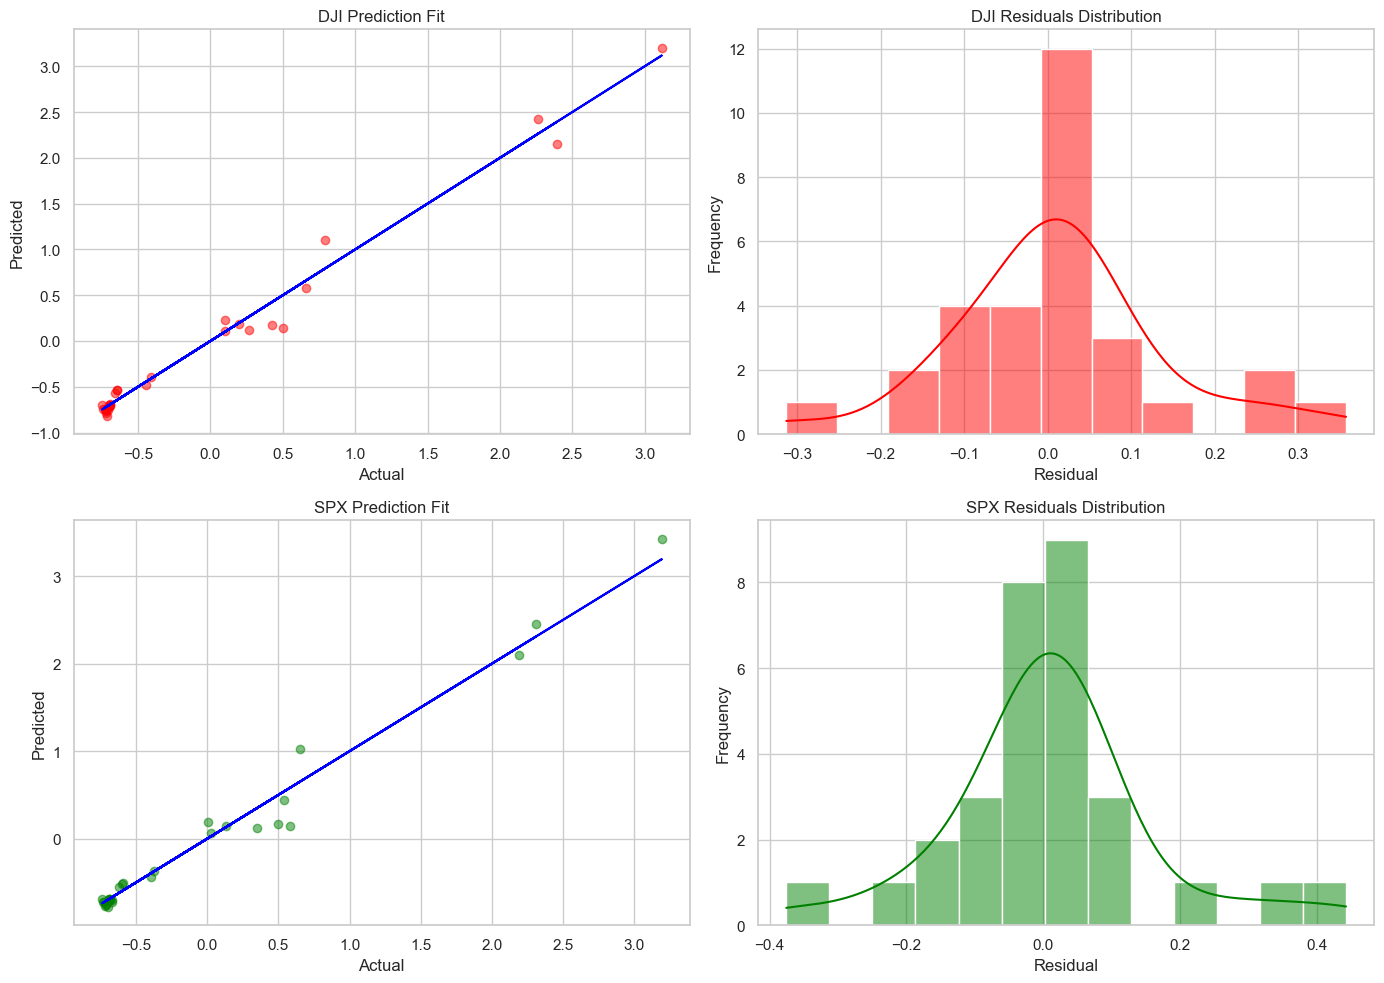

In [13]:
# Plotting fitting graphs and residual distribution for DJI and SPX models

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10), dpi=100)

# Fitting graph for DJI
axes[0, 0].scatter(y_test_dji, dji_predictions, color="red", alpha=0.5)
axes[0, 0].plot(y_test_dji, y_test_dji, color="blue")  # Ideal fit
axes[0, 0].set_title('DJI Prediction Fit')
axes[0, 0].set_xlabel('Actual')
axes[0, 0].set_ylabel('Predicted')

# Residuals for DJI
residuals_dji = y_test_dji - dji_predictions
sns.histplot(residuals_dji, kde=True, ax=axes[0, 1], color="red")
axes[0, 1].set_title('DJI Residuals Distribution')
axes[0, 1].set_xlabel('Residual')
axes[0, 1].set_ylabel('Frequency')

# Fitting graph for SPX
axes[1, 0].scatter(y_test_spx, spx_predictions, color="green", alpha=0.5)
axes[1, 0].plot(y_test_spx, y_test_spx, color="blue")  # Ideal fit
axes[1, 0].set_title('SPX Prediction Fit')
axes[1, 0].set_xlabel('Actual')
axes[1, 0].set_ylabel('Predicted')

# Residuals for SPX
residuals_spx = y_test_spx - spx_predictions
sns.histplot(residuals_spx, kde=True, ax=axes[1, 1], color="green")
axes[1, 1].set_title('SPX Residuals Distribution')
axes[1, 1].set_xlabel('Residual')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [14]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 为statsmodels的预测变量集添加常数项
X_train_dji_const = sm.add_constant(X_train_dji)
X_train_spx_const = sm.add_constant(X_train_spx)

# 使用statsmodels拟合模型以获取详细统计信息
model_dji_sm = sm.OLS(y_train_dji, X_train_dji_const).fit()
model_spx_sm = sm.OLS(y_train_spx, X_train_spx_const).fit()

# 计算DJI和SPX模型的VIF
vif_data_dji = pd.DataFrame()
vif_data_dji["feature"] = X_train_dji_const.columns
vif_data_dji["VIF"] = [variance_inflation_factor(X_train_dji_const.values, i) for i in range(X_train_dji_const.shape[1])]

vif_data_spx = pd.DataFrame()
vif_data_spx["feature"] = X_train_spx_const.columns
vif_data_spx["VIF"] = [variance_inflation_factor(X_train_spx_const.values, i) for i in range(X_train_spx_const.shape[1])]

model_dji_sm.summary(), model_spx_sm.summary(), vif_data_dji, vif_data_spx


(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    DJI   R-squared:                       0.989
 Model:                            OLS   Adj. R-squared:                  0.988
 Method:                 Least Squares   F-statistic:                     937.8
 Date:                Mon, 08 Apr 2024   Prob (F-statistic):           7.66e-98
 Time:                        00:32:29   Log-Likelihood:                 97.094
 No. Observations:                 116   AIC:                            -172.2
 Df Residuals:                     105   BIC:                            -141.9
 Df Model:                          10                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

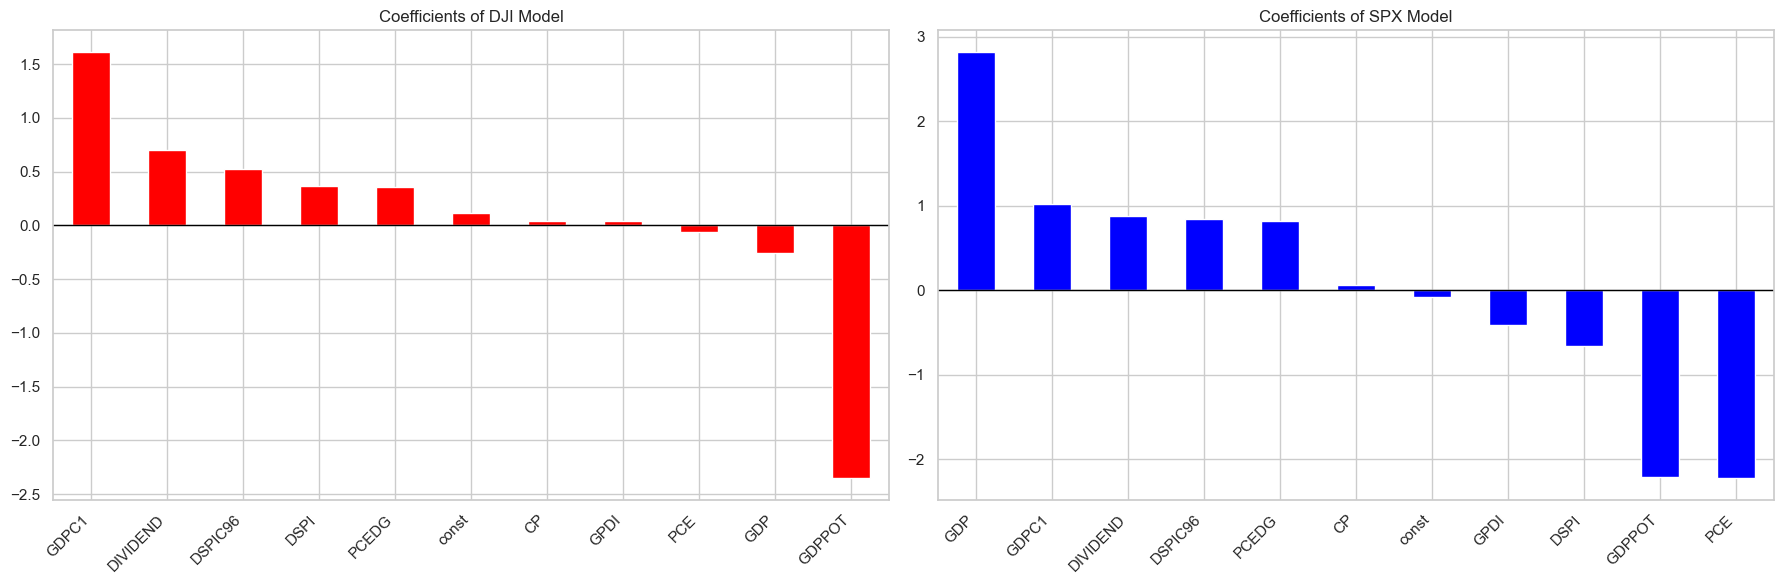

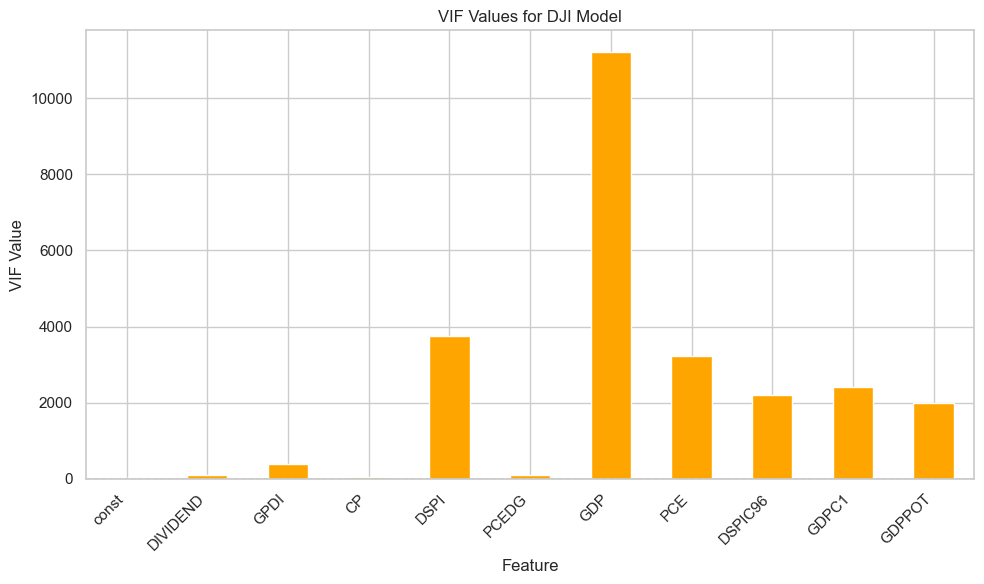

In [15]:
# Plotting the model coefficients for DJI and SPX models
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6), dpi=100)

# Coefficients for DJI model
coefs_dji = pd.DataFrame(model_dji_sm.params, columns=['Coefficient'])
coefs_dji['P-Value'] = model_dji_sm.pvalues
coefs_dji = coefs_dji.sort_values(by='Coefficient', ascending=False)
coefs_dji.plot(kind='bar', ax=axes[0], y='Coefficient', color='red', legend=False)
axes[0].set_title('Coefficients of DJI Model')
axes[0].set_xticklabels(coefs_dji.index, rotation=45, ha="right")
axes[0].axhline(y=0, color='black', linewidth=1)

# Coefficients for SPX model
coefs_spx = pd.DataFrame(model_spx_sm.params, columns=['Coefficient'])
coefs_spx['P-Value'] = model_spx_sm.pvalues
coefs_spx = coefs_spx.sort_values(by='Coefficient', ascending=False)
coefs_spx.plot(kind='bar', ax=axes[1], y='Coefficient', color='blue', legend=False)
axes[1].set_title('Coefficients of SPX Model')
axes[1].set_xticklabels(coefs_spx.index, rotation=45, ha="right")
axes[1].axhline(y=0, color='black', linewidth=1)

plt.tight_layout()
plt.show()

# VIF values for DJI model visualization
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
vif_data_dji.plot(kind='bar', x='feature', y='VIF', ax=ax, color='orange', legend=False)
ax.set_title('VIF Values for DJI Model')
ax.set_ylabel('VIF Value')
ax.set_xlabel('Feature')
ax.axhline(y=10, color='black', linestyle='--', linewidth=1)
ax.set_xticklabels(vif_data_dji['feature'], rotation=45, ha="right")

plt.tight_layout()
plt.show()


In [16]:
from sklearn.linear_model import Ridge

# 对DJI和SPX模型应用岭回归
ridge_model_dji = Ridge(alpha=1.0)
ridge_model_dji.fit(X_train_dji, y_train_dji)
dji_ridge_predictions = ridge_model_dji.predict(X_test_dji)
dji_ridge_mse = mean_squared_error(y_test_dji, dji_ridge_predictions)
dji_ridge_r2 = r2_score(y_test_dji, dji_ridge_predictions)

ridge_model_spx = Ridge(alpha=1.0)
ridge_model_spx.fit(X_train_spx, y_train_spx)
spx_ridge_predictions = ridge_model_spx.predict(X_test_spx)
spx_ridge_mse = mean_squared_error(y_test_spx, spx_ridge_predictions)
spx_ridge_r2 = r2_score(y_test_spx, spx_ridge_predictions)

dji_ridge_mse, dji_ridge_r2, spx_ridge_mse, spx_ridge_r2


(0.027892575554974916,
 0.9728557173009922,
 0.03146326612955377,
 0.9684891205727268)

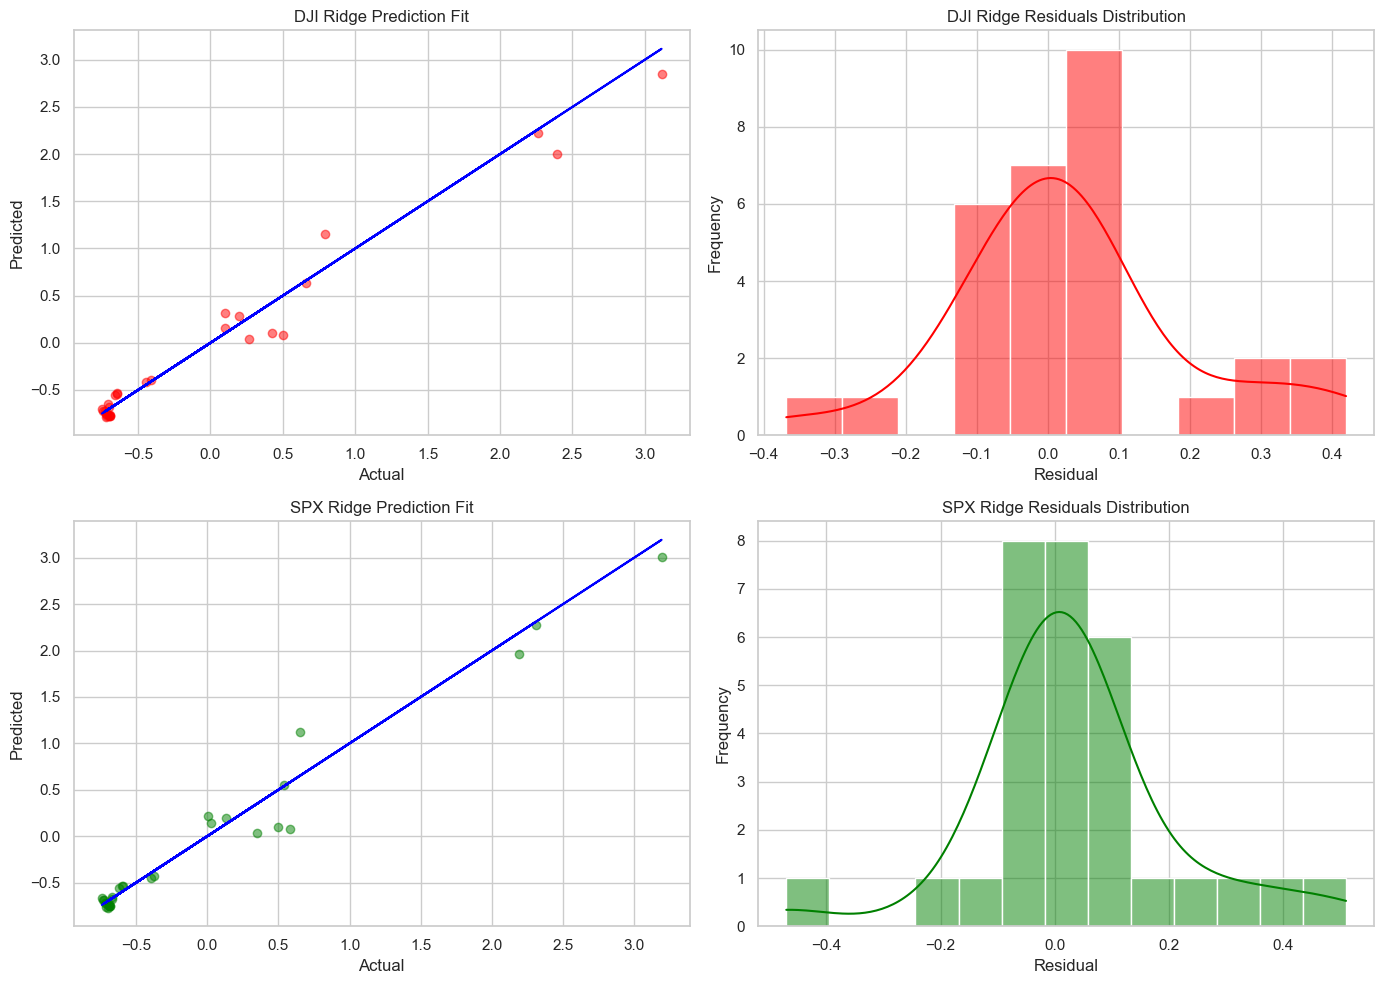

In [17]:
# Plotting fitting graphs and residual distribution for Ridge Regression models (DJI and SPX)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10), dpi=100)

# Fitting graph for DJI Ridge Regression
axes[0, 0].scatter(y_test_dji, dji_ridge_predictions, color="red", alpha=0.5)
axes[0, 0].plot(y_test_dji, y_test_dji, color="blue")  # Ideal fit
axes[0, 0].set_title('DJI Ridge Prediction Fit')
axes[0, 0].set_xlabel('Actual')
axes[0, 0].set_ylabel('Predicted')

# Residuals for DJI Ridge Regression
residuals_dji_ridge = y_test_dji - dji_ridge_predictions
sns.histplot(residuals_dji_ridge, kde=True, ax=axes[0, 1], color="red")
axes[0, 1].set_title('DJI Ridge Residuals Distribution')
axes[0, 1].set_xlabel('Residual')
axes[0, 1].set_ylabel('Frequency')

# Fitting graph for SPX Ridge Regression
axes[1, 0].scatter(y_test_spx, spx_ridge_predictions, color="green", alpha=0.5)
axes[1, 0].plot(y_test_spx, y_test_spx, color="blue")  # Ideal fit
axes[1, 0].set_title('SPX Ridge Prediction Fit')
axes[1, 0].set_xlabel('Actual')
axes[1, 0].set_ylabel('Predicted')

# Residuals for SPX Ridge Regression
residuals_spx_ridge = y_test_spx - spx_ridge_predictions
sns.histplot(residuals_spx_ridge, kde=True, ax=axes[1, 1], color="green")
axes[1, 1].set_title('SPX Ridge Residuals Distribution')
axes[1, 1].set_xlabel('Residual')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [18]:
from sklearn.linear_model import Lasso

# 对DJI和SPX模型应用Lasso回归
lasso_model_dji = Lasso(alpha=0.001)
lasso_model_dji.fit(X_train_dji, y_train_dji)
dji_lasso_predictions = lasso_model_dji.predict(X_test_dji)
dji_lasso_mse = mean_squared_error(y_test_dji, dji_lasso_predictions)
dji_lasso_r2 = r2_score(y_test_dji, dji_lasso_predictions)

lasso_model_spx = Lasso(alpha=0.001)
lasso_model_spx.fit(X_train_spx, y_train_spx)
spx_lasso_predictions = lasso_model_spx.predict(X_test_spx)
spx_lasso_mse = mean_squared_error(y_test_spx, spx_lasso_predictions)
spx_lasso_r2 = r2_score(y_test_spx, spx_lasso_predictions)

dji_lasso_mse, dji_lasso_r2, spx_lasso_mse, spx_lasso_r2


(0.0252845004775073,
 0.9753938237968762,
 0.03122408914534477,
 0.9687286595029878)

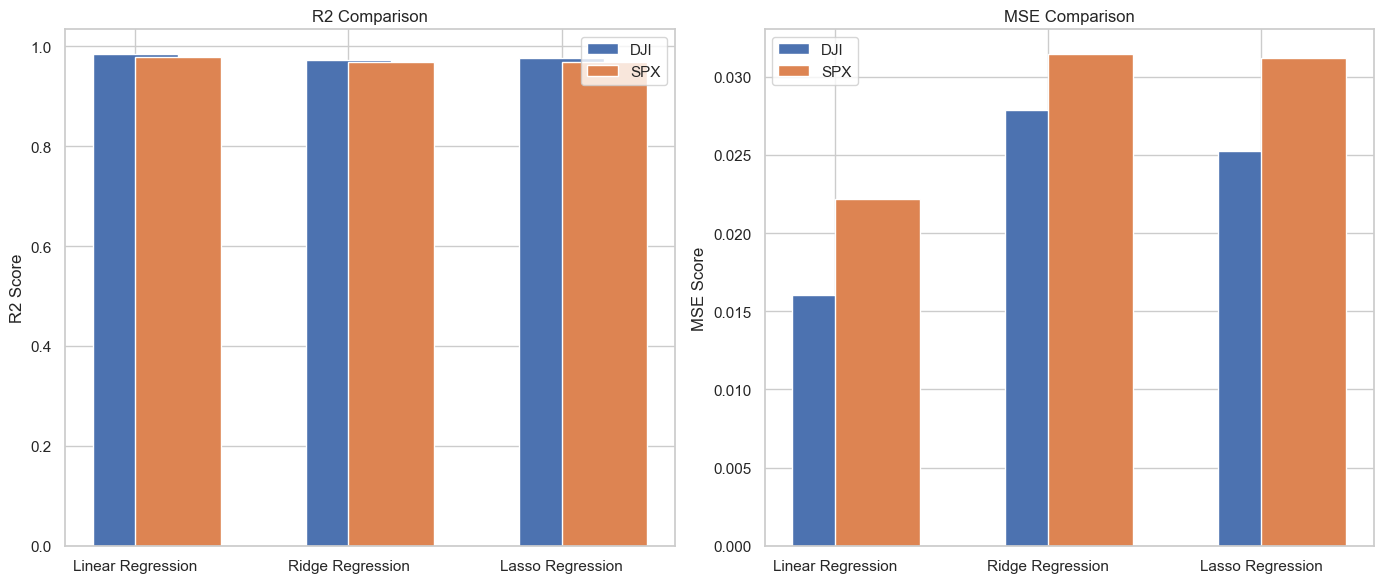

In [19]:
# Comparing R2 and MSE for three models: Linear Regression, Ridge Regression, and Lasso Regression
model_names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
dji_r2_values = [dji_r2, dji_ridge_r2, dji_lasso_r2]
spx_r2_values = [spx_r2, spx_ridge_r2, spx_lasso_r2]
dji_mse_values = [dji_mse, dji_ridge_mse, dji_lasso_mse]
spx_mse_values = [spx_mse, spx_ridge_mse, spx_lasso_mse]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), dpi=100)

# R2 Comparison
axes[0].bar(model_names, dji_r2_values, width=0.4, label='DJI', align='center')
axes[0].bar(model_names, spx_r2_values, width=0.4, label='SPX', align='edge')
axes[0].set_title('R2 Comparison')
axes[0].set_ylabel('R2 Score')
axes[0].legend()

# MSE Comparison
axes[1].bar(model_names, dji_mse_values, width=0.4, label='DJI', align='center')
axes[1].bar(model_names, spx_mse_values, width=0.4, label='SPX', align='edge')
axes[1].set_title('MSE Comparison')
axes[1].set_ylabel('MSE Score')
axes[1].legend()

plt.tight_layout()
plt.show()
